In [1]:
import sys
#sys.path.append('../')
import os
os.path.expanduser('~')
# connect to global DB instead of local one (adjust path accordingly) and please export it locally 
os.environ["FIFTYONE_CONFIG_PATH"] = os.path.expanduser('~') + "/.fiftyone/config.global_mongodb.json"
#os.environ["FIFTYONE_CONFIG_PATH"] = os.path.expanduser('~') + "/.fiftyone/app_config.json"
print(os.environ["FIFTYONE_CONFIG_PATH"])

/home/hichem/.fiftyone/config.global_mongodb.json


In [2]:
import fiftyone as fo
from fiftyone import ViewField as F
import numpy as np
import cv2
import os
fo.list_datasets()

['HENSOLDT',
 'KEYMAKR_VIDEO_DATASET',
 'MV_SAILING_IMAGES_QA',
 'MV_SAILING_QA',
 'MV_SENTRY_VIDEOS_QA',
 'OUTSOURCE_SEG_ANNOTATIONS',
 'SAILING_DATASET',
 'SAILING_DATASET_QA',
 'SAILING_PANOPTIC_DATASET_QA',
 'SAM_TRACK_IMAGES',
 'SEGMENTATION_DATASET',
 'SENTRY_16BIT8BIT_DATASET',
 'SENTRY_IMAGES_SUBSAMPLE',
 'SENTRY_PANOPTIC_DATASET_QA',
 'SENTRY_SNAPSHOTS',
 'SENTRY_VIDEOS_DATASET_ALL',
 'SENTRY_VIDEOS_DATASET_QA',
 'TRAIN_PANOPTIC_DATASET',
 'TRAIN_PANOPTIC_OPTIMIZED_NAT',
 'TRAIN_RL_SPLIT_THERMAL_2023_11',
 'TRAIN_RL_SPLIT_THERMAL_2024_03',
 'TRAIN_THERMAL_DATASET_2023_06']

In [5]:
sequence = "Sentry_2023_02_08_PROACT_CELADON_@6m_MOB_2023_02_08_14_27_29"
dataset_name = "MV_SENTRY_VIDEOS_QA"
sequence_view = fo.load_dataset(dataset_name).match(F("sequence") == sequence)
dataset = sequence_view

In [ ]:
DATASET_NAME = "MV_SENTRY_VIDEOS_QA"
dataset = fo.load_dataset(DATASET_NAME)

In [ ]:
#path_text = "Sentry_2022_07_PROACT_CELADON_7.5M_CONTAINER"
#view = dataset.match(F('filepath').contains_str(path_text))

In [ ]:
# in case the data is localy exported please use this but don't forget to restart the kernal before !!

# import fiftyone as fo
# import numpy as np
# import cv2
# import os
# from fiftyone import ViewField as F
# fo.app_config.color_by = "value" # dataset look better with this setting
# fo.list_datasets()
# if fo.list_datasets()!=[]:
#     dataset = [fo.delete_dataset(i) for i in fo.list_datasets()]
# fo.list_datasets()

# dataset_name = "Sentry_2022_07_PROACT_CELADON_7.5M_CONTAINER"
# def import_dataset(dataset_name):
#     dataset_dir = "/home/hichem/Documents/SEA.AI/Tasks/Horizon_fusion_noise_models/data_sentry/"
#     if dataset_name not in fo.list_datasets():
#         # Import the dataset
#         dataset = fo.Dataset.from_dir(
#         dataset_dir=dataset_dir,
#         dataset_type=fo.types.FiftyOneDataset,
#         name=dataset_name
#     )
#     return dataset
# dataset = import_dataset(dataset_name)
# dataset.persistent = True


In [6]:
 fo.launch_app(dataset)

Dataset:         MV_SENTRY_VIDEOS_QA
Media type:      group
Num groups:      1
Selected groups: 0
Selected labels: 0
Session URL:     http://localhost:5151/
View stages:
    1. Match(filter={'$expr': {'$eq': [...]}})

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys
import logging

sys.path.append("..")

# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#logging.basicConfig(level=logging.INFO, format="%(levelname)-8s | %(message)s")
logging.basicConfig( format="%(levelname)-8s | %(message)s")

In [ ]:
# ********** please uncomment this to login to hugginFace *********
#from huggingface_hub import login
#login()


In [ ]:
from tqdm import tqdm
from itertools import zip_longest

In [7]:
import cv2
from seavision.inference.utils import load_image_from_url, convert_to_8bit
from seavision import load_model
from seavision.inference.utils import (
    pil_side_by_side,
    pil_up_down,
    convert_to_8bit,

)
from avi_r import AVIReader


In [8]:
import base64


class VideoReader():
    def __init__(self, video_path):
        self.video_path = video_path
        self.video_file = AVIReader(self.video_path)
        self.frame_number = self.video_file.num_frames

    def get_frame_at_jpg(self, frame_number):
        frame = self.video_file.get_at(frame_number)
        frame_vis = self.visualize_thermal_image_linear(frame.to_ndarray())
        encode_img = self.encode_image(frame_vis)
        return encode_img
    

    def get_frame_at(self, frame_number):
        frame = self.video_file.get_at(frame_number)
        frame_vis = self.visualize_thermal_image_linear(frame.to_ndarray())
        return frame_vis

    @staticmethod
    def encode_image(img):
        _, encimg = cv2.imencode('.jpg', img)
        encoded = str(base64.b64encode(encimg), 'utf-8')
        return "data:image/jpg;base64,"+encoded
    

    def visualize_thermal_image_linear(self, img, max_span = 5000):

        img_min = np.amin(img)
        img_max = np.amax(img)
        img_max = np.min((img_max,img_min+max_span))
        img = np.clip(img, img_min, img_max)

        img = (img-img_min)/(img_max-img_min)*255
        img = img.astype(np.uint8)
        img = np.repeat(img[..., np.newaxis], 1, axis=2)
        return img


In [9]:
from tqdm import tqdm
from itertools import zip_longest

# RGB part was commented due to the lack for the RGB data for now
#grp_rgb_n = dataset
#grp_rgb_w = dataset
grp_thermal_n = dataset
grp_thermal_w = dataset

#rgb_n_view = grp_rgb_n.select_group_slices("rgb_narrow")
#rgb_w_view = grp_rgb_w.select_group_slices("rgb_wide")
thermal_n_view = grp_thermal_n.select_group_slices("thermal_narrow")
thermal_w_view = grp_thermal_w.select_group_slices("thermal_wide")



Class mapping not found.
  2%|▏         | 131/6523 [00:18<15:20,  6.94it/s]


KeyboardInterrupt: 

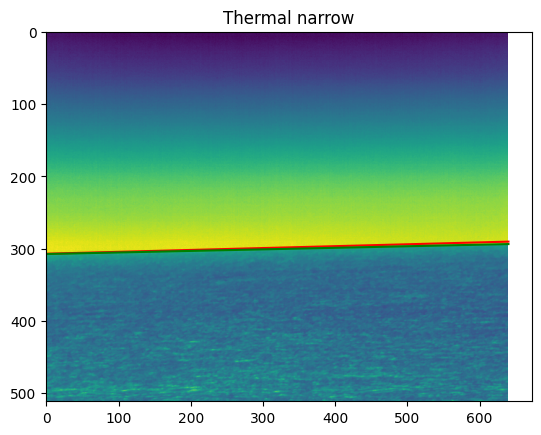

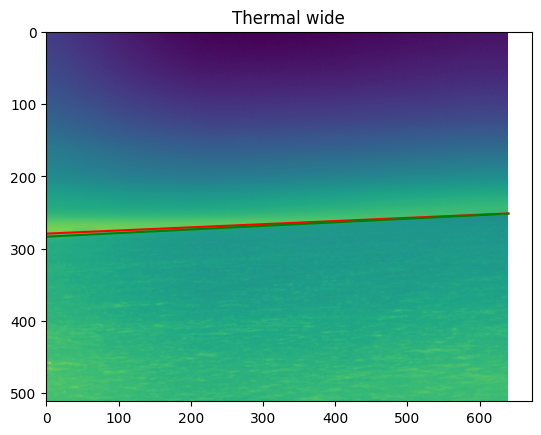

In [16]:
from itertools import zip_longest
from matplotlib import pyplot as plt
import pprint
import evaluate

cnn_c = load_model("cerulean-level-b2-landscape.onnx")
cnn_a = load_model("ahoy-RGB-b2.onnx")
cnn_b = load_model("ahoy-IR-b2.onnx")


ground_truth_points_rgb_n = []
ground_truth_points_rgb_w = []
ground_truth_points_thermal_n = []
ground_truth_points_thermal_w = []

prediction_points_rgb_n = []
prediction_points_rgb_w = []
prediction_points_thermal_n = []
prediction_points_thermal_w = []


draw_first_img = True

# RGB code commented
#for sample_n_rgb,sample_w_rgb,sample_n_thermal, sample_w_thermal in zip_longest(rgb_n_view,rgb_w_view,thermal_n_view, thermal_w_view):

for sample_n_thermal, sample_w_thermal in zip_longest(thermal_n_view, thermal_w_view):
    # frames_cn = sample_n_rgb.frames
    # frames_cw= sample_w_rgb.frames
    # frames_tn = sample_n_thermal.frames
    # frames_tw = sample_w_thermal.frames

    # RGB code commented
    #cap_cn = cv2.VideoCapture(sample_n_rgb.filepath)
    #frames_cn = int(cap_cn.get(cv2.CAP_PROP_FRAME_COUNT))

    #cap_cw = cv2.VideoCapture(sample_w_rgb.filepath)
    #frames_cw = int(cap_cw.get(cv2.CAP_PROP_FRAME_COUNT))


    sample_n_thermal_path = sample_n_thermal.filepath.replace("8Bit", "16Bit").replace("mp4", "avi")
    sample_w_thermal_path = sample_w_thermal.filepath.replace("8Bit", "16Bit").replace("mp4", "avi")

    

    tn_vid = VideoReader(sample_n_thermal_path)
    tw_vid = VideoReader(sample_w_thermal_path)
    


    frames_tn = tn_vid.frame_number
    frames_tw = tw_vid.frame_number

    min_frames = min(frames_tn, frames_tw)

    #RGB code commented
    # min_frames = min(frames_cn, frames_cw) # , frames_tn, frames_tw

    for i in tqdm(range(1, min_frames + 1)):  # Frames are 1-indexed


        #RGB code commented
        #success_cn, frame_cn = cap_cn.read()
        #success_cw, frame_cw = cap_cw.read()

        #RGB code commented
        #height_cn, width_cn, _ = frame_cn.shape
        #height_cw, width_cw, _ = frame_cw.shape


        height_tn =  tn_vid.video_file.height
        width_tn = tn_vid.video_file.width
        height_tw =  tw_vid.video_file.height
        width_tw = tw_vid.video_file.width


        #RGB code commented
        #ims = [frame_cn, frame_cw]
        #results = cnn_a(ims, verbose=False)
        
        frame_tn = tn_vid.get_frame_at(i)
        frame_tw = tw_vid.get_frame_at(i)              

        ims = [frame_tn, frame_tw]

        results = cnn_c(ims, verbose=False)     

        #RGB code commented
        #line_xyxy_rgb_n = results[0].horizon.line.xyxy
        #line_xyxy_rgb_w = results[1].horizon.line.xyxy

        #line_xyxyn_rgb_n = results[0].horizon.line.xyxy_n
        #line_xyxyn_rgb_w = results[1].horizon.line.xyxy_n        

        try:
            line_xyxy_thermal_n = results[0].horizon.line.xyxy
            line_xyxy_thermal_w = results[1].horizon.line.xyxy

            line_xyxyn_thermal_n = results[0].horizon.line.xyxy_n
            line_xyxyn_thermal_w = results[1].horizon.line.xyxy_n    
        except:
            continue


        #RGB code commented
        #ground_truth_points_rgb_n.append(sample_n_rgb[i]["ground_truth_pl"]["polylines"][0].points[0])
        #ground_truth_points_rgb_w.append(sample_w_rgb[i]["ground_truth_pl"]["polylines"][0].points[0])

        #prediction_points_rgb_n.append([[line_xyxyn_rgb_n[0], line_xyxyn_rgb_n[1]], [line_xyxyn_rgb_n[2], line_xyxyn_rgb_n[3]]])
        #prediction_points_rgb_w.append([[line_xyxyn_rgb_w[0], line_xyxyn_rgb_w[1]], [line_xyxyn_rgb_w[2], line_xyxyn_rgb_w[3]]])

        ground_truth_points_thermal_n.append(sample_n_thermal[i]["ground_truth_pl"]["polylines"][0].points[0])
        ground_truth_points_thermal_w.append(sample_w_thermal[i]["ground_truth_pl"]["polylines"][0].points[0])

        prediction_points_thermal_n.append([[line_xyxyn_thermal_n[0], line_xyxyn_thermal_n[1]], [line_xyxyn_thermal_n[2], line_xyxyn_thermal_n[3]]])
        prediction_points_thermal_w.append([[line_xyxyn_thermal_w[0], line_xyxyn_thermal_w[1]], [line_xyxyn_thermal_w[2], line_xyxyn_thermal_w[3]]])


        if draw_first_img:


            #RGB code commented
            # line_rgb_n_gt = [
            #     sample_n_rgb[i]["ground_truth_pl"]["polylines"][0].points[0][0][0] * width_cn,  # xmin
            #     sample_n_rgb[i]["ground_truth_pl"]["polylines"][0].points[0][0][1] * height_cn, # ymin
            #     sample_n_rgb[i]["ground_truth_pl"]["polylines"][0].points[0][1][0] * width_cn,  # xmax
            #     sample_n_rgb[i]["ground_truth_pl"]["polylines"][0].points[0][1][1] * height_cn  # ymax
            # ]

            # line_rgb_w_gt = [
            #     sample_w_rgb[i]["ground_truth_pl"]["polylines"][0].points[0][0][0] * width_cw,  # xmin
            #     sample_w_rgb[i]["ground_truth_pl"]["polylines"][0].points[0][0][1] * height_cw, # ymin
            #     sample_w_rgb[i]["ground_truth_pl"]["polylines"][0].points[0][1][0] * width_cw,  # xmax
            #     sample_w_rgb[i]["ground_truth_pl"]["polylines"][0].points[0][1][1] * height_cw  # ymax
            # ]


            #RGB code commented
            # Check if any of the captures have reached the end of the video
            #if not (success_cn and success_cw):
            #    break


            #RGB code commented
            # plt.figure(0)
            # plt.imshow(frame_cn)
            # plt.plot([line_xyxy_rgb_n[0], line_xyxy_rgb_n[2]], [line_xyxy_rgb_n[1], line_xyxy_rgb_n[3]], 'r')
            # plt.plot([line_rgb_n_gt[0], line_rgb_n_gt[2]], [line_rgb_n_gt[1], line_rgb_n_gt[3]], 'g')

            # plt.title('RGB narrow')

            #RGB code commented
            # plt.figure(1)
            # plt.imshow(frame_cw)
            # plt.plot([line_xyxy_rgb_w[0], line_xyxy_rgb_w[2]], [line_xyxy_rgb_w[1], line_xyxy_rgb_w[3]], 'r')
            # plt.plot([line_rgb_w_gt[0], line_rgb_w_gt[2]], [line_rgb_w_gt[1], line_rgb_w_gt[3]], 'g')
            # plt.title('RGB wide')



            line_thermal_n_gt = [
                sample_n_thermal[i]["ground_truth_pl"]["polylines"][0].points[0][0][0] * width_tn,  # xmin
                sample_n_thermal[i]["ground_truth_pl"]["polylines"][0].points[0][0][1] * height_tn, # ymin
                sample_n_thermal[i]["ground_truth_pl"]["polylines"][0].points[0][1][0] * width_tn,  # xmax
                sample_n_thermal[i]["ground_truth_pl"]["polylines"][0].points[0][1][1] * height_tn  # ymax
            ]

            line_thermal_w_gt = [
                sample_w_thermal[i]["ground_truth_pl"]["polylines"][0].points[0][0][0] * width_tw,  # xmin
                sample_w_thermal[i]["ground_truth_pl"]["polylines"][0].points[0][0][1] * height_tw, # ymin
                sample_w_thermal[i]["ground_truth_pl"]["polylines"][0].points[0][1][0] * width_tw,  # xmax
                sample_w_thermal[i]["ground_truth_pl"]["polylines"][0].points[0][1][1] * height_tw  # ymax
            ]


            plt.figure(0)
            plt.imshow(frame_tn)
            plt.plot([line_xyxy_thermal_n[0], line_xyxy_thermal_n[2]], [line_xyxy_thermal_n[1], line_xyxy_thermal_n[3]], 'r')
            plt.plot([line_thermal_n_gt[0], line_thermal_n_gt[2]], [line_thermal_n_gt[1], line_thermal_n_gt[3]], 'g')

            plt.title('Thermal narrow')


            plt.figure(1)
            plt.imshow(frame_tw)
            plt.plot([line_xyxy_thermal_w[0], line_xyxy_thermal_w[2]], [line_xyxy_thermal_w[1], line_xyxy_thermal_w[3]], 'r')
            plt.plot([line_thermal_w_gt[0], line_thermal_w_gt[2]], [line_thermal_w_gt[1], line_thermal_w_gt[3]], 'g')
            plt.title('Thermal wide')   
            draw_first_img = False        



#RGB code commented
# module = evaluate.load("SEA-AI/horizon-metrics") 
# module.add(predictions=ground_truth_points_rgb_n, references=prediction_points_rgb_n)
# output_rgb_n = module.compute()
# print(output_rgb_n)

#RGB code commented
# module = evaluate.load("SEA-AI/horizon-metrics") 
# module.add(predictions=ground_truth_points_rgb_w, references=prediction_points_rgb_w)
# output_rgb_w = module.compute()
# print(output_rgb_w)


module = evaluate.load("SEA-AI/horizon-metrics") 
module.add(predictions=ground_truth_points_thermal_n, references=prediction_points_thermal_n)
output_thermal_n = module.compute()
print(output_thermal_n)

module = evaluate.load("SEA-AI/horizon-metrics") 
module.add(predictions=ground_truth_points_thermal_w, references=prediction_points_thermal_w)
output_thermal_w = module.compute()
print(output_thermal_w)




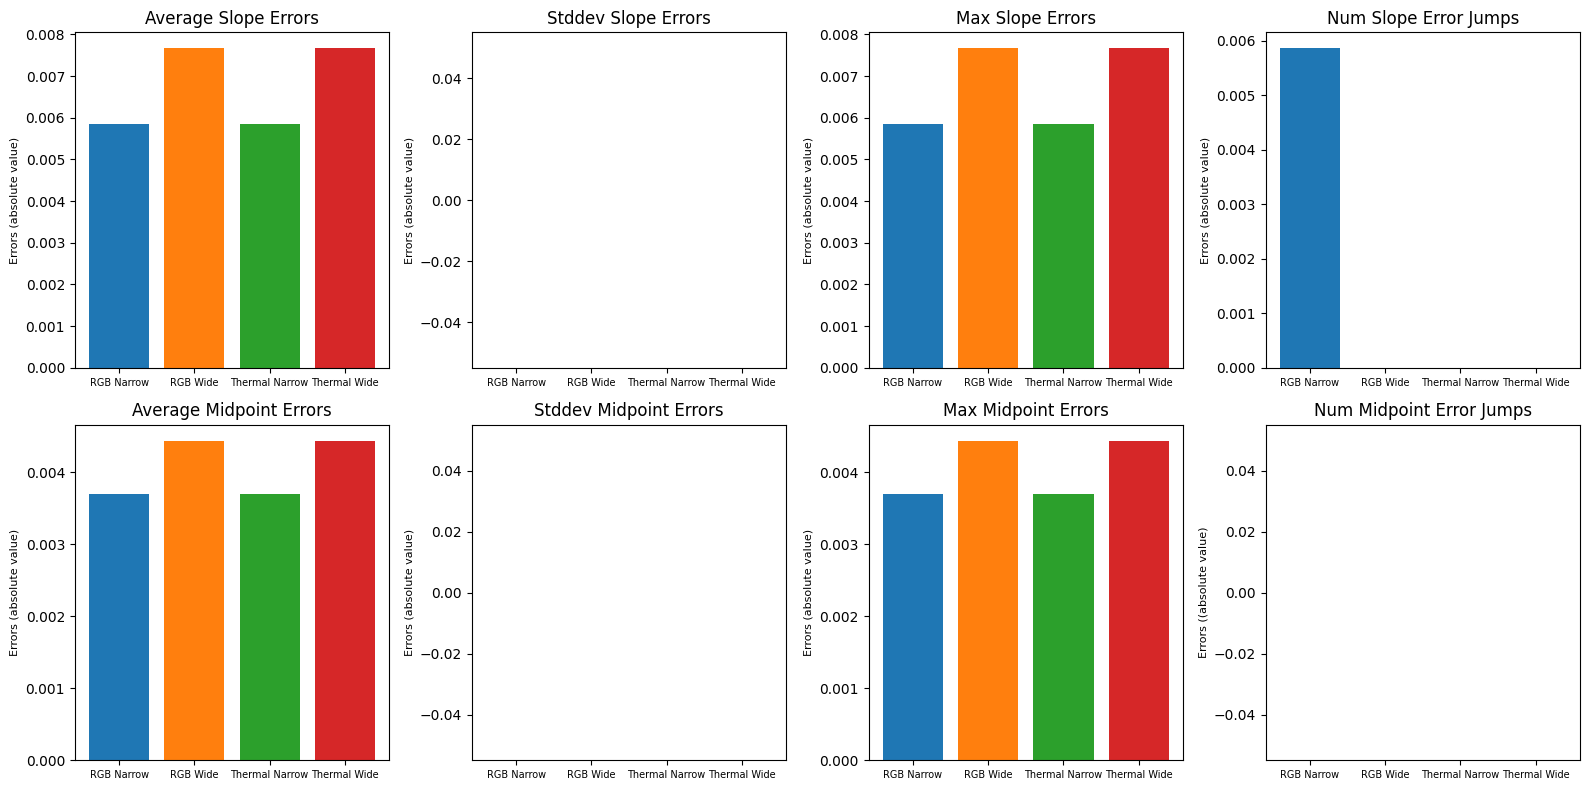

In [17]:


# to adjust later
output_rgb_n = output_thermal_n
output_rgb_w = output_thermal_w


categories = ['RGB Narrow', 'RGB Wide', 'Thermal Narrow', 'Thermal Wide']

average_slope_errors = [output_rgb_n["average_slope_error"], output_rgb_w["average_slope_error"] , output_thermal_n["average_slope_error"], output_thermal_w["average_slope_error"]] 
stddev_slope_errors = [output_rgb_n["stddev_slope_error"], output_rgb_w["stddev_slope_error"] , output_thermal_n["stddev_slope_error"], output_thermal_w["stddev_slope_error"]]
max_slope_errors = [output_rgb_n["max_slope_error"], output_rgb_w["max_slope_error"] , output_thermal_n["max_slope_error"], output_thermal_w["max_slope_error"]]
num_slope_error_jumps = [output_rgb_n["average_slope_error"], output_rgb_w["num_slope_error_jumps"] , output_thermal_n["num_slope_error_jumps"], output_thermal_w["num_slope_error_jumps"]]


average_midpoint_errors = [output_rgb_n["average_midpoint_error"], output_rgb_w["average_midpoint_error"] , output_thermal_n["average_midpoint_error"], output_thermal_w["average_midpoint_error"]]
stddev_midpoint_errors = [output_rgb_n["stddev_midpoint_error"], output_rgb_w["stddev_midpoint_error"] , output_thermal_n["stddev_midpoint_error"], output_thermal_w["stddev_midpoint_error"]]
max_midpoint_errors = [output_rgb_n["max_midpoint_error"], output_rgb_w["max_midpoint_error"] , output_thermal_n["max_midpoint_error"], output_thermal_w["max_midpoint_error"]]
num_midpoint_error_jumps = [output_rgb_n["num_midpoint_error_jumps"], output_rgb_w["num_midpoint_error_jumps"] , output_thermal_n["num_midpoint_error_jumps"], output_thermal_w["num_midpoint_error_jumps"]]


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


# Plotting
fig, ax = plt.subplots(2, 4, figsize=(16, 8))

# Plot Average Slope Errors
ax[0, 0].bar(categories, average_slope_errors, color=colors)
ax[0, 0].set_title('Average Slope Errors')
ax[0, 0].set_ylabel('Errors (absolute value)', fontsize=8)

# Plot Stddev Slope Errors
ax[0, 1].bar(categories, stddev_slope_errors, color=colors)
ax[0, 1].set_title('Stddev Slope Errors')
ax[0, 1].set_ylabel('Errors (absolute value)', fontsize=8)

# Plot Max Slope Errors
ax[0, 2].bar(categories, max_slope_errors, color=colors)
ax[0, 2].set_title('Max Slope Errors')
ax[0, 2].set_ylabel('Errors (absolute value)', fontsize=8)

# Plot Num Slope Error Jumps
ax[0, 3].bar(categories, num_slope_error_jumps, color=colors)
ax[0, 3].set_title('Num Slope Error Jumps')
ax[0, 3].set_ylabel('Errors (absolute value)', fontsize=8)


# Plot Average Midpoint Errors
ax[1, 0].bar(categories, average_midpoint_errors, color=colors)
ax[1, 0].set_title('Average Midpoint Errors')
ax[1, 0].set_ylabel('Errors (absolute value)', fontsize=8)

# Plot Stddev Midpoint Errors
ax[1, 1].bar(categories, stddev_midpoint_errors, color=colors)
ax[1, 1].set_title('Stddev Midpoint Errors')
ax[1, 1].set_ylabel('Errors (absolute value)', fontsize=8)

# Plot Max Midpoint Errors
ax[1, 2].bar(categories, max_midpoint_errors, color=colors)
ax[1, 2].set_title('Max Midpoint Errors')
ax[1, 2].set_ylabel('Errors (absolute value)', fontsize=8)

# Plot Num Midpoint Error Jumps
ax[1, 3].bar(categories, num_midpoint_error_jumps, color=colors)
ax[1, 3].set_title('Num Midpoint Error Jumps')
ax[1, 3].set_ylabel('Errors ((absolute value)', fontsize=8)





for axes in ax.flat:
    axes.tick_params(axis='x', labelsize=7)  # Adjust x-axis label font size

plt.tight_layout()
plt.show()